# TensorFlow

## Carlos Antonio Cueva Rojas
## Maching Learning


### Introdución:

TensorFlow es una biblioteca desarrollada por Google que nos permite realizar cálculos numéricos usando diagramas de flujo de datos. Los nodos del grafo representan operaciones matemáticas, mientras que los vértices del grafo representan datos multidimensionales (tensores) comunicándose entre ellos. Esta arquitectura facilita crear aplicaciones distribuidas.


### Instalación:

Se puede observar muchas formas de instalar tensorflow, para fines prácticos, partiendo del curso (tenemos conda), usamos esta forma de instalación.

De cualquier forma podemos hacer [click aqui](https://www.tensorflow.org/versions/r0.11/get_started/os_setup.html#download-and-setup) para más información.


Usando Ubuntu 16.04 y con Anaconda. Basta con seguir las instrucciones.

* ``` conda install -c conda-forge tensorflow ```




### Empenzando a usar:

Ya una vez instalado podemos poner a prueba con un pequeño hola mundo.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x_data = np.random.rand(100).astype(np.float32)
print(x_data)
y_data = x_data * 0.1 + 0.3
print(y_data)

[ 0.32311648  0.69779658  0.97849518  0.304389    0.50192624  0.06104559
  0.45384809  0.93893033  0.73412353  0.94780862  0.96193254  0.29888785
  0.6082285   0.07293429  0.66396761  0.7378999   0.31780696  0.80652118
  0.89196074  0.08676874  0.48559481  0.36849794  0.2211825   0.35918251
  0.29391763  0.13087136  0.78749144  0.2809121   0.47282714  0.65707159
  0.02002251  0.60860437  0.79210663  0.92332107  0.5980407   0.65348822
  0.40365309  0.18964496  0.34392872  0.391765    0.65014625  0.10467692
  0.34017077  0.33377746  0.53030306  0.42611504  0.6564256   0.26662305
  0.01447615  0.03737282  0.71592408  0.86358982  0.72473729  0.57601893
  0.17320849  0.31182012  0.45440918  0.10768751  0.25599146  0.4789809
  0.65228838  0.15240169  0.54258168  0.43719581  0.78402132  0.3854028
  0.80596119  0.25911453  0.73573321  0.92111266  0.3290545   0.80627477
  0.63165087  0.90400279  0.73085922  0.99476802  0.91431773  0.82830745
  0.18947889  0.89146525  0.28827128  0.84971303  0.9

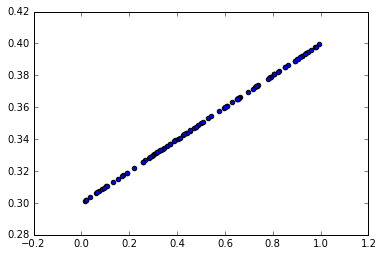

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x_data,y_data)

Observamos claramente que **y** esta en función de **x**. Supongamos que requerimos hacer una regresión lineal, los valores óptimos serian 0.1 y 0.3. 

In [26]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

Ahora tenemos una variable **y** que se define como w * x_data+b, entonces si hacemos y=y_data se tendrá que w=0.1 y b=0.3.   
Consultamos el valor de W

In [27]:
print(W)

No hay ningún valor, esto es porque aún no se inicializan las variables.

In [28]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Ahora si probemos a inicializar las variables 

In [29]:
init = tf.initialize_all_variables()

In [30]:
print(W)

Creamos la sesión y procedemos a ejecutarla.

In [31]:
sess = tf.Session()
sess.run(init)

Ahora ha inicializado los valores.

In [32]:
for paso in range(201):
    sess.run(train)
    if paso % 20 == 0:
        print(paso, sess.run(W), sess.run(b))

0 [-0.15120175] [ 0.6222657]
20 [ 0.00931638] [ 0.35002753]
40 [ 0.07499626] [ 0.31379387]
60 [ 0.09310587] [ 0.30380329]
80 [ 0.09809911] [ 0.30104867]
100 [ 0.09947588] [ 0.30028915]
120 [ 0.0998555] [ 0.30007973]
140 [ 0.09996015] [ 0.30002201]
160 [ 0.09998904] [ 0.30000606]
180 [ 0.09999698] [ 0.30000168]
200 [ 0.09999915] [ 0.30000049]


In [33]:
print(sess.run(W))

[ 0.09999915]


De esta forma hemos conseguido un ejemplo muy claro, de  regresión lineal.

### Análisis de las  partes.

####  Construyendo el grafo

Como se menciono con anterioridad, tensorflow funciona  considerando las operaciones de un grafo. de esta forma, se genera una construcción fácil de seguir y evaluar.

In [34]:
#Contruimos en el grafo por defecto una matris 1x2

matrix1 = tf.constant([[3., 3.]])

#Construimos otra matris de 2x1
matrix2 = tf.constant([[2.],[2.]])

#AGregamos una operación matrix1 x matrix2
product = tf.matmul(matrix1, matrix2)



Ahora el grafo por defecto tiene dos constantes y una operación de multiplicación.  

#### Construyendo la sesión

Si en la construcción no le enviamos parámetros, carga el grafo por defecto.


In [35]:
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[ 12.]]


Otra forma, es instanciando directamente. en un for

In [37]:
with tf.Session() as sess:
  result2 = sess.run([product])
  print(result2)

[array([[ 12.]], dtype=float32)]


* Uso iterativo 

También podemos usar una sessión iterativa. Usar métodos como **.eval** y **.run** en caso de  métodos

In [43]:
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])


x.initializer.run()

sub = tf.sub(x, a)
print(sub.eval())

sess.close()

[-2. -1.]


## Tensores

Tensores son lo que se basa la librería, se puede considerar directamente como un array de n dimensiones o una lista.

### Tensor RanK

En el sistema TensorFlow, los tensores se describen por una unidad de dimensionalidad conocido como rango. 
**Tensor Rank** no es el mismo que el rango de la matriz. Tensor Rank (a veces conocido como orden o grado o n-dimensión) es el número de dimensiones del tensor. Por ejemplo, la siguiente tensor (definida como una lista de Python) tiene un rango de 2:

t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


    Rank 	Math entity 	                    Python example
    0       Scalar (magnitude only) 	        s = 483
    1 	    Vector (magnitude and direction) 	v = [1.1, 2.2, 3.3]
    2 	    Matrix (table of numbers) 	        m = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    3 	    3-Tensor (cube of numbers) 	        t = [[[2], [4], [6]], [[8], [10], [12]], [[14], [16], [18]]]
    n 	    n-Tensor (you get the idea) 	    ...
    
    
### Data Type

    Data type 	Python type 	Description
    DT_FLOAT 	tf.float32 	32 bits floating point.
    DT_DOUBLE 	tf.float64 	64 bits floating point.
    DT_INT8 	tf.int8 	8 bits signed integer.
    DT_INT16 	tf.int16 	16 bits signed integer.
    DT_INT32 	tf.int32 	32 bits signed integer.
    DT_INT64 	tf.int64 	64 bits signed integer.
    DT_UINT8 	tf.uint8 	8 bits unsigned integer.
    DT_UINT16 	tf.uint16 	16 bits unsigned integer.
    DT_STRING 	tf.string 	Variable length byte arrays. Each element of a Tensor is a byte array.
    DT_BOOL 	tf.bool 	Boolean.
    DT_COMPLEX64 	tf.complex64 	Complex number made of two 32 bits floating points: real and imaginary parts.
    DT_COMPLEX128 	tf.complex128 	Complex number made of two 64 bits floating points: real and imaginary parts.
    DT_QINT8 	tf.qint8 	8 bits signed integer used in quantized Ops.
    DT_QINT32 	tf.qint32 	32 bits signed integer used in quantized Ops.
    DT_QUINT8 	tf.quint8 	8 bits unsigned integer used in quantized Ops.




## Variables

Cuando se entrena un modelo, se utiliza variables para mantener y actualizar parámetros. Las variables son buffers de memoria que contiene los tensores. Ellos deben inicializarse explícitamente y se pueden guardar en el disco durante y después del entrenamiento. Más tarde, se puede restaurar los valores  o analizar el modelo guardado.


In [44]:
#Inicializando variables

weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35),
                      name="weights")
biases = tf.Variable(tf.zeros([200]), name="biases")


In [45]:
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.initialize_all_variables()

# Launch the graph and run the ops.
with tf.Session() as sess:
  # Run the 'init' op
  sess.run(init_op)
  # Print the initial value of 'state'
  print(sess.run(state))
  # Run the op that updates 'state' and print 'state'.
  for _ in range(3):
    sess.run(update)
    print(sess.run(state))

0
1
2
3


### Fetches
Las salidas de las operaciones

In [46]:
input1 = tf.constant([3.0])
input2 = tf.constant([2.0])
input3 = tf.constant([5.0])
intermed = tf.add(input2, input3)
mul = tf.mul(input1, intermed)

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print(result)

[array([ 21.], dtype=float32), array([ 7.], dtype=float32)]


### Feeds


TensorFlow también proporciona un mecanismo de alimentación para parchear un tensor directamente en cualquier operación en el grafo.

In [47]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.mul(input1, input2)

with tf.Session() as sess:
  print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))


[array([ 14.], dtype=float32)]
